### Seaborn For Exploratory Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import Seaborn for Styling
import seaborn as sns
sns.set_style('whitegrid')   

In [3]:
Loan = pd.read_csv("...../loan_table.csv", index_col=0)
Loan.head()

,loan_purpose,date,loan_granted,loan_repaid
loan_id,,,,
19454,investment,2012-03-15,0,NaN
496811,investment,2012-01-17,0,NaN
929493,other,2012-02-09,0,NaN
580653,other,2012-06-27,1,1.0
172419,business,2012-05-21,1,0.0


In [4]:
Borrower = pd.read_csv("...../borrower_table.csv", index_col=0)
Borrower.head()

,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
loan_id,,,,,,,,,,,
289774,1,NaN,NaN,8000,0.49,3285,1073,0,0,47,3
482590,0,1.0,0.0,4500,1.03,636,5299,1,13500,33,1
135565,1,NaN,NaN,6900,0.82,2085,3422,1,24500,38,8
207797,0,1.0,0.0,1200,0.82,358,3388,0,0,24,1
828078,0,0.0,0.0,6900,0.80,2138,4282,1,18100,36,1


In [5]:
Loan.shape   

(101100, 4)

In [6]:
Borrower.shape

(101100, 11)

In [7]:
Loan.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_granted,101100.0,0.471355,0.499181,0.0,0.0,0.0,1.0,1.0
loan_repaid,47654.0,0.644353,0.478714,0.0,0.0,1.0,1.0,1.0


In [8]:
Borrower.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_first_loan,101100.0,0.543492,0.498107,0.0,0.0,1.00,1.00,1.00
fully_repaid_previous_loans,46153.0,0.899291,0.300946,0.0,1.0,1.00,1.00,1.00
currently_repaying_other_loans,46153.0,0.364332,0.481247,0.0,0.0,0.00,1.00,1.00
total_credit_card_limit,101100.0,4112.743818,2129.121462,0.0,2700.0,4100.00,5500.00,13500.00
avg_percentage_credit_card_limit_used_last_year,94128.0,0.724140,0.186483,0.0,0.6,0.73,0.86,1.09
saving_amount,101100.0,1799.617616,1400.545141,0.0,834.0,1339.00,2409.00,10641.00
checking_amount,101100.0,3177.150821,2044.448155,0.0,1706.0,2673.00,4241.00,13906.00
is_employed,101100.0,0.658675,0.474157,0.0,0.0,1.00,1.00,1.00
yearly_salary,101100.0,21020.727992,18937.581415,0.0,0.0,21500.00,35300.00,97200.00
age,101100.0,41.491632,12.825570,18.0,32.0,41.00,50.00,79.00


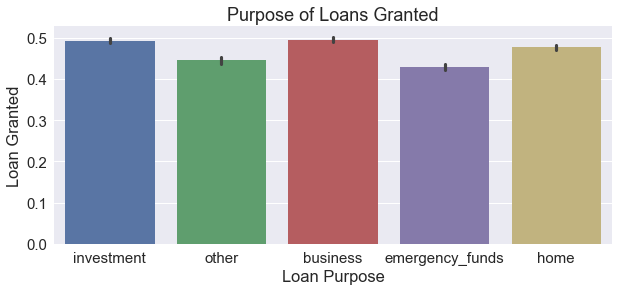

In [9]:
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(10,4))
Plot1 = sns.barplot(x="loan_purpose", y="loan_granted", data=Loan)
Plot1.set(xlabel = "Loan Purpose", ylabel = "Loan Granted", title = "Purpose of Loans Granted")

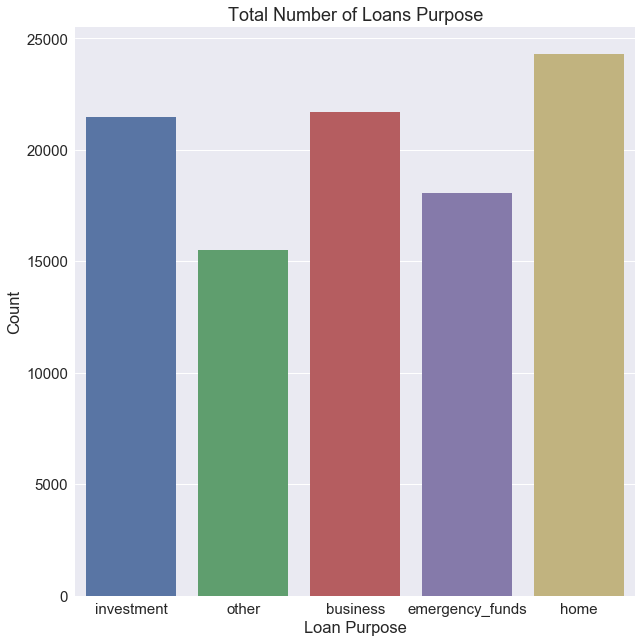

In [10]:
sns.set(font_scale=1.5)
Plot2=sns.factorplot("loan_purpose", kind="count", data=Loan, size=9)
Plot2.set(xlabel = "Loan Purpose", ylabel = "Count", title = "Total Number of Loans Purpose")

In [11]:
from matplotlib.colors import ListedColormap

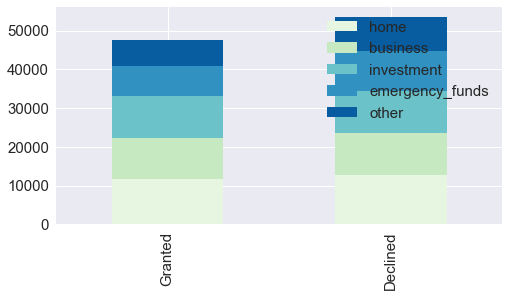

In [12]:
sns.set(font_scale=1.5)
loan_passed=Loan[Loan['loan_granted']==1]['loan_purpose'].value_counts()
loan_declined=Loan[Loan['loan_granted']==0]['loan_purpose'].value_counts()
Loan_granted=pd.DataFrame([loan_passed,loan_declined])
Loan_granted.index=['Granted', 'Declined']
Loan_granted.plot(kind='bar',stacked=True,colormap=ListedColormap(sns.color_palette("GnBu", 10)), 
          figsize=(8,4))


In [13]:
Loan_merge=Loan.join(Borrower).reset_index()
Loan_merge.head()

,loan_id,loan_purpose,date,loan_granted,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
0,19454,investment,2012-03-15,0,NaN,1,NaN,NaN,8600,0.79,1491,6285,1,45200,42,7
1,496811,investment,2012-01-17,0,NaN,1,NaN,NaN,5300,0.52,141,5793,0,0,42,5
2,929493,other,2012-02-09,0,NaN,1,NaN,NaN,0,NaN,660,3232,1,26500,60,4
3,580653,other,2012-06-27,1,1.0,0,1.0,0.0,5400,0.52,3345,2764,1,15800,58,4
4,172419,business,2012-05-21,1,0.0,1,NaN,NaN,2900,0.76,1050,3695,1,34800,31,4


In [14]:
Loan_merge.shape

(101100, 16)

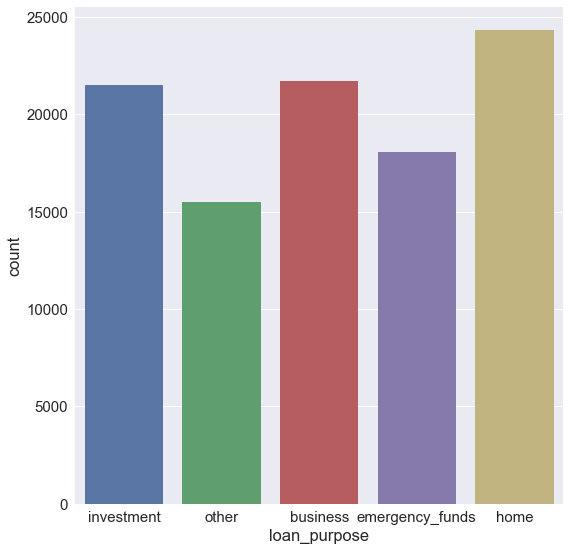

In [15]:
sns.set(font_scale=1.5)

sns.factorplot("loan_purpose", kind="count", data=Loan_merge, size=8)

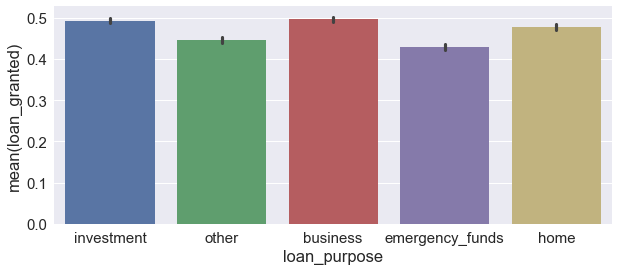

In [16]:
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(10,4))
sns.barplot(x="loan_purpose", y="loan_granted", data=Loan_merge)

In [17]:
Corr=Loan_merge.corr()
Corr


,loan_id,loan_granted,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
loan_id,1.000000,0.001704,-0.002704,0.003189,0.001387,0.001275,0.001023,0.003245,-0.000062,-0.000456,0.007865,0.003887,0.006614,0.002364
loan_granted,0.001704,1.000000,NaN,-0.004398,0.010092,-0.131299,0.184099,-0.128104,0.150180,0.148726,0.500165,0.410128,0.002431,-0.040237
loan_repaid,-0.002704,NaN,1.000000,0.012824,0.038665,-0.496350,0.401911,-0.209870,0.493699,0.494341,0.305749,0.426648,0.000947,-0.136384
is_first_loan,0.003189,-0.004398,0.012824,1.000000,NaN,NaN,0.000679,-0.000781,0.005650,0.005114,-0.000971,-0.001674,-0.002353,0.000887
fully_repaid_previous_loans,0.001387,0.010092,0.038665,NaN,1.000000,-0.022080,0.021643,0.000647,0.019695,0.018730,0.011067,0.014564,0.003200,-0.005784
currently_repaying_other_loans,0.001275,-0.131299,-0.496350,NaN,-0.022080,1.000000,-0.212519,0.109173,-0.275134,-0.268906,-0.218764,-0.256847,-0.003638,0.071857
total_credit_card_limit,0.001023,0.184099,0.401911,0.000679,0.021643,-0.212519,1.000000,-0.096055,0.234181,0.240926,0.195274,0.222497,-0.004052,-0.058650
avg_percentage_credit_card_limit_used_last_year,0.003245,-0.128104,-0.209870,-0.000781,0.000647,0.109173,-0.096055,1.000000,-0.119002,-0.117580,-0.101024,-0.116005,-0.000550,0.032053
saving_amount,-0.000062,0.150180,0.493699,0.005650,0.019695,-0.275134,0.234181,-0.119002,1.000000,0.301041,0.248526,0.288712,-0.005321,-0.075647
checking_amount,-0.000456,0.148726,0.494341,0.005114,0.018730,-0.268906,0.240926,-0.117580,0.301041,1.000000,0.244383,0.282909,0.000355,-0.081963


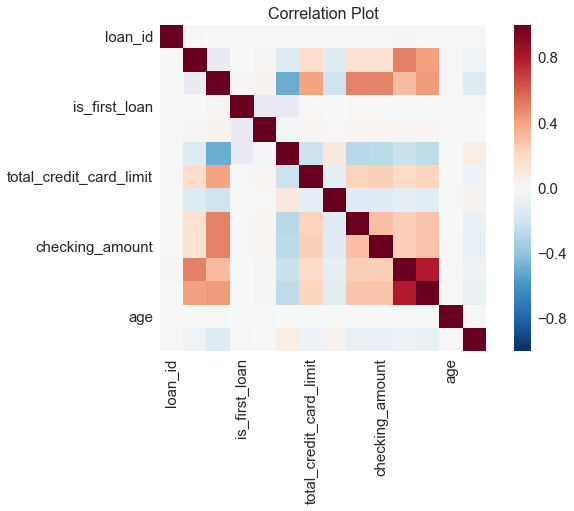

In [18]:
# Heatmap
sns.set(font_scale=1.5)
f, ax = plt.subplots(figsize=(10,6))

plt.title("Correlation Plot",fontsize=16)
sns.heatmap(Corr, square=True, xticklabels=3, yticklabels=3, ax=ax)